In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)


In [2]:
df1=pd.read_csv('Pune_rent.csv.zip')
df1

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
0,OWNER,1,BHK,Independent Floor,Mundhwa,"6,750",450,Unfurnished,1 bathrooms
1,OWNER,2,BHK,Apartment,Wakad,"18,000",916,Unfurnished,2 bathrooms
2,OWNER,3,BHK,Apartment,Wagholi,"16,500",1085,Semi-Furnished,3 bathrooms
3,OWNER,1,RK,Studio Apartment,Kothrud,"8,000",250,Furnished,1 bathrooms
4,OWNER,2,BHK,Apartment,Yerawada,"25,000",1005,Semi-Furnished,2 bathrooms
...,...,...,...,...,...,...,...,...,...
22795,OWNER,1,BHK,Apartment,Chinchwad,"13,250",650,Semi-Furnished,1 bathrooms
22796,OWNER,1,RK,Studio Apartment,Wadgaon Sheri,"7,000",350,Unfurnished,1 bathrooms
22797,OWNER,1,BHK,Apartment,Kothrud,"8,500",389,Semi-Furnished,1 bathrooms
22798,AGENT,1,BHK,Apartment,Wakad,"16,500",670,Semi-Furnished,2 bathrooms


In [3]:
df1.property_type.describe()

count         22800
unique            6
top       Apartment
freq          20172
Name: property_type, dtype: object

In [4]:
df2=df1.drop(['seller_type',"layout_type"],axis=1)
df2

,bedroom,property_type,locality,price,area,furnish_type,bathroom
0,1,Independent Floor,Mundhwa,"6,750",450,Unfurnished,1 bathrooms
1,2,Apartment,Wakad,"18,000",916,Unfurnished,2 bathrooms
2,3,Apartment,Wagholi,"16,500",1085,Semi-Furnished,3 bathrooms
3,1,Studio Apartment,Kothrud,"8,000",250,Furnished,1 bathrooms
4,2,Apartment,Yerawada,"25,000",1005,Semi-Furnished,2 bathrooms
...,...,...,...,...,...,...,...
22795,1,Apartment,Chinchwad,"13,250",650,Semi-Furnished,1 bathrooms
22796,1,Studio Apartment,Wadgaon Sheri,"7,000",350,Unfurnished,1 bathrooms
22797,1,Apartment,Kothrud,"8,500",389,Semi-Furnished,1 bathrooms
22798,1,Apartment,Wakad,"16,500",670,Semi-Furnished,2 bathrooms


In [5]:
df2.isnull().sum()

bedroom            0
property_type      0
locality           0
price              0
area               0
furnish_type       0
bathroom         171
dtype: int64

In [6]:
df3=df2.dropna()
df3.isnull().sum()

bedroom          0
property_type    0
locality         0
price            0
area             0
furnish_type     0
bathroom         0
dtype: int64

In [7]:
df3.bathroom.unique()

array(['1 bathrooms', '2 bathrooms', '3 bathrooms', '4 bathrooms',
       '5 bathrooms', 'East facing', 'NorthEast facing', '6 bathrooms',
       'Grfloor', 'North facing', 'West facing', '11 of 11floor',
       '8 bathrooms', '1 of 3floor', '1 of 2floor'], dtype=object)

In [8]:
df3.groupby('bathroom')['bathroom'].agg('count')

bathroom
1 bathrooms          7598
1 of 2floor             2
1 of 3floor             1
11 of 11floor           1
2 bathrooms         11184
3 bathrooms          3103
4 bathrooms           569
5 bathrooms           126
6 bathrooms            15
8 bathrooms             1
East facing            15
Grfloor                 4
North facing            2
NorthEast facing        1
West facing             7
Name: bathroom, dtype: int64

In [9]:
valid_bathrooms = ['1 bathrooms', '2 bathrooms', '3 bathrooms', '4 bathrooms', '5 bathrooms', '6 bathrooms']
mask = df3['bathroom'].isin(valid_bathrooms)
df_filtered = df3[mask]

In [10]:
df_filtered.groupby('bathroom')['bathroom'].agg('count')

bathroom
1 bathrooms     7598
2 bathrooms    11184
3 bathrooms     3103
4 bathrooms      569
5 bathrooms      126
6 bathrooms       15
Name: bathroom, dtype: int64

In [11]:
df_filtered

,bedroom,property_type,locality,price,area,furnish_type,bathroom
0,1,Independent Floor,Mundhwa,"6,750",450,Unfurnished,1 bathrooms
1,2,Apartment,Wakad,"18,000",916,Unfurnished,2 bathrooms
2,3,Apartment,Wagholi,"16,500",1085,Semi-Furnished,3 bathrooms
3,1,Studio Apartment,Kothrud,"8,000",250,Furnished,1 bathrooms
4,2,Apartment,Yerawada,"25,000",1005,Semi-Furnished,2 bathrooms
...,...,...,...,...,...,...,...
22795,1,Apartment,Chinchwad,"13,250",650,Semi-Furnished,1 bathrooms
22796,1,Studio Apartment,Wadgaon Sheri,"7,000",350,Unfurnished,1 bathrooms
22797,1,Apartment,Kothrud,"8,500",389,Semi-Furnished,1 bathrooms
22798,1,Apartment,Wakad,"16,500",670,Semi-Furnished,2 bathrooms


In [12]:
df_filtered['bathrooms']=df_filtered.bathroom.apply(lambda x:int(x.split(' ')[0]))


C:\Users\Ayush Meena\AppData\Local\Temp\ipykernel_17392\2015666816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['bathrooms']=df_filtered.bathroom.apply(lambda x:int(x.split(' ')[0]))


In [13]:
df_filtered

,bedroom,property_type,locality,price,area,furnish_type,bathroom,bathrooms
0,1,Independent Floor,Mundhwa,"6,750",450,Unfurnished,1 bathrooms,1
1,2,Apartment,Wakad,"18,000",916,Unfurnished,2 bathrooms,2
2,3,Apartment,Wagholi,"16,500",1085,Semi-Furnished,3 bathrooms,3
3,1,Studio Apartment,Kothrud,"8,000",250,Furnished,1 bathrooms,1
4,2,Apartment,Yerawada,"25,000",1005,Semi-Furnished,2 bathrooms,2
...,...,...,...,...,...,...,...,...
22795,1,Apartment,Chinchwad,"13,250",650,Semi-Furnished,1 bathrooms,1
22796,1,Studio Apartment,Wadgaon Sheri,"7,000",350,Unfurnished,1 bathrooms,1
22797,1,Apartment,Kothrud,"8,500",389,Semi-Furnished,1 bathrooms,1
22798,1,Apartment,Wakad,"16,500",670,Semi-Furnished,2 bathrooms,2


In [14]:
df_filtered=df_filtered.drop('bathroom',axis=1)

In [15]:
df_filtered.area.unique()

array([ 450,  916, 1085, ...,  302,  445,  389], dtype=int64)

In [16]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [17]:
df_filtered[~df_filtered.price.apply(is_float)]

,bedroom,property_type,locality,price,area,furnish_type,bathrooms
0,1,Independent Floor,Mundhwa,"6,750",450,Unfurnished,1
1,2,Apartment,Wakad,"18,000",916,Unfurnished,2
2,3,Apartment,Wagholi,"16,500",1085,Semi-Furnished,3
3,1,Studio Apartment,Kothrud,"8,000",250,Furnished,1
4,2,Apartment,Yerawada,"25,000",1005,Semi-Furnished,2
...,...,...,...,...,...,...,...
22795,1,Apartment,Chinchwad,"13,250",650,Semi-Furnished,1
22796,1,Studio Apartment,Wadgaon Sheri,"7,000",350,Unfurnished,1
22797,1,Apartment,Kothrud,"8,500",389,Semi-Furnished,1
22798,1,Apartment,Wakad,"16,500",670,Semi-Furnished,2


In [18]:
def remove_comma(x):
    tokens=x.split(',')
    if len(tokens)==2:
        return float(str(tokens[0])+str(tokens[1]))
    try:
        float(x)
    except:
        return None


In [19]:
df4=df_filtered.copy()
df4['price']=df4['price'].apply(remove_comma)
df4

,bedroom,property_type,locality,price,area,furnish_type,bathrooms
0,1,Independent Floor,Mundhwa,6750.0,450,Unfurnished,1
1,2,Apartment,Wakad,18000.0,916,Unfurnished,2
2,3,Apartment,Wagholi,16500.0,1085,Semi-Furnished,3
3,1,Studio Apartment,Kothrud,8000.0,250,Furnished,1
4,2,Apartment,Yerawada,25000.0,1005,Semi-Furnished,2
...,...,...,...,...,...,...,...
22795,1,Apartment,Chinchwad,13250.0,650,Semi-Furnished,1
22796,1,Studio Apartment,Wadgaon Sheri,7000.0,350,Unfurnished,1
22797,1,Apartment,Kothrud,8500.0,389,Semi-Furnished,1
22798,1,Apartment,Wakad,16500.0,670,Semi-Furnished,2


In [20]:
df4.price.unique()

array([ 6750., 18000., 16500.,  8000., 25000., 11000., 17000., 13500.,
        3500., 12000.,  6500., 20000.,  9500., 45000., 35000.,  7500.,
       30000., 15000., 14000.,  9000., 13000.,  4000., 24000., 17400.,
       18500.,  6800., 10000.,  4500.,  8100., 19000.,  6000., 12500.,
       16000., 14500., 21000., 17500., 31000.,  7000.,  8500., 27000.,
       10500., 50000.,  2000., 14650., 15650., 22000., 32000.,    nan,
       23000.,  4999., 29000.,  3800.,  5000., 12400.,  5200., 22250.,
       11500., 17900., 74000., 26500., 69000., 54000., 23500., 39000.,
       34000., 26000., 35500., 33000., 64000., 22500., 19250., 28000.,
       40000., 42000., 36000., 55000., 68000., 15500., 20500., 38000.,
       15999., 44000., 21500., 41000., 12750., 12600., 10750., 14850.,
       14800., 11999., 30500., 19500., 18850., 14501., 70000., 75000.,
       60000., 18100., 18560., 18750., 19700., 19900., 19600., 19950.,
       23600., 19100., 21750., 18620., 18650., 18800., 18562., 18200.,
      

In [21]:
len(df4.locality.unique())

458

In [22]:
df4.locality=df4.locality.apply(lambda x: x.strip())
location_stats=df4.groupby('locality')['locality'].agg('count').sort_values(ascending=False)
location_stats.head(100)

locality
Wagholi             2160
Hinjewadi           1442
Wakad               1250
Kharadi             1218
Hadapsar            1105
                    ... 
Anand Nagar           18
Agalambe              18
Bhegade Aali          17
Pune Satara Road      16
Dattavadi             16
Name: locality, Length: 100, dtype: int64

In [23]:
len(location_stats[location_stats<=10])

332

In [24]:
loc_less_then_10=location_stats[location_stats<=10]

In [25]:
df4.locality=df4.locality.apply(lambda x: 'other' if x in loc_less_then_10 else x)
len(df4.locality.unique())

127

In [26]:
df4

,bedroom,property_type,locality,price,area,furnish_type,bathrooms
0,1,Independent Floor,Mundhwa,6750.0,450,Unfurnished,1
1,2,Apartment,Wakad,18000.0,916,Unfurnished,2
2,3,Apartment,Wagholi,16500.0,1085,Semi-Furnished,3
3,1,Studio Apartment,Kothrud,8000.0,250,Furnished,1
4,2,Apartment,Yerawada,25000.0,1005,Semi-Furnished,2
...,...,...,...,...,...,...,...
22795,1,Apartment,Chinchwad,13250.0,650,Semi-Furnished,1
22796,1,Studio Apartment,Wadgaon Sheri,7000.0,350,Unfurnished,1
22797,1,Apartment,Kothrud,8500.0,389,Semi-Furnished,1
22798,1,Apartment,Wakad,16500.0,670,Semi-Furnished,2


In [27]:
df4[df4.area/df4.bedroom<300]

,bedroom,property_type,locality,price,area,furnish_type,bathrooms
3,1,Studio Apartment,Kothrud,8000.0,250,Furnished,1
8,1,Studio Apartment,Dhanori,3500.0,200,Furnished,1
80,1,Studio Apartment,Pimpri,8500.0,270,Unfurnished,1
105,1,Studio Apartment,Kothrud,8000.0,250,Furnished,1
118,1,Studio Apartment,Katraj,2000.0,200,Furnished,1
...,...,...,...,...,...,...,...
22426,1,Studio Apartment,Gokhalenagar,16000.0,250,Furnished,1
22542,4,Independent House,Koregaon Park,NaN,1100,Semi-Furnished,4
22573,1,Studio Apartment,Dhanori,6000.0,250,Unfurnished,1
22641,4,Independent House,Koregaon Park,NaN,1100,Semi-Furnished,4


In [28]:
len(df4)

22595

In [29]:
df5=df4[~(df4.area/df4.bedroom<300)]
len(df5)

22362

In [30]:
df5['price_per_unit_area'] = df5['price'] / df5['area']
df5

C:\Users\Ayush Meena\AppData\Local\Temp\ipykernel_17392\3003818985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['price_per_unit_area'] = df5['price'] / df5['area']


,bedroom,property_type,locality,price,area,furnish_type,bathrooms,price_per_unit_area
0,1,Independent Floor,Mundhwa,6750.0,450,Unfurnished,1,15.000000
1,2,Apartment,Wakad,18000.0,916,Unfurnished,2,19.650655
2,3,Apartment,Wagholi,16500.0,1085,Semi-Furnished,3,15.207373
4,2,Apartment,Yerawada,25000.0,1005,Semi-Furnished,2,24.875622
5,1,Apartment,other,11000.0,600,Semi-Furnished,1,18.333333
...,...,...,...,...,...,...,...,...
22795,1,Apartment,Chinchwad,13250.0,650,Semi-Furnished,1,20.384615
22796,1,Studio Apartment,Wadgaon Sheri,7000.0,350,Unfurnished,1,20.000000
22797,1,Apartment,Kothrud,8500.0,389,Semi-Furnished,1,21.850900
22798,1,Apartment,Wakad,16500.0,670,Semi-Furnished,2,24.626866


In [31]:
df5.price_per_unit_area.describe()

count    22130.000000
mean        18.789820
std          6.584526
min          4.000000
25%         14.721346
50%         18.000900
75%         21.818182
max        225.000000
Name: price_per_unit_area, dtype: float64

In [32]:
def remove_ppua_outliers(df):
    df_out=pd.DataFrame()
    for Key,subdf in df.groupby('locality'):
        m=np.mean(subdf.price_per_unit_area)
        st=np.std(subdf.price_per_unit_area)
        reduced_df=subdf[(subdf.price_per_unit_area>(m-st))&(subdf.price_per_unit_area<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [33]:
len(df5)

22362

In [34]:
df6=remove_ppua_outliers(df5)
len(df6)

16941

In [35]:
df6.head(10)


,bedroom,property_type,locality,price,area,furnish_type,bathrooms,price_per_unit_area
0,2,Apartment,Agalambe,17000.0,1100,Unfurnished,2,15.454545
1,3,Apartment,Agalambe,45000.0,2200,Furnished,3,20.454545
2,3,Apartment,Agalambe,45000.0,2200,Furnished,3,20.454545
3,3,Apartment,Agalambe,45000.0,2200,Furnished,3,20.454545
4,1,Apartment,Agalambe,6000.0,400,Semi-Furnished,1,15.000000
5,2,Apartment,Agalambe,13500.0,915,Unfurnished,2,14.754098
6,2,Apartment,Agalambe,13500.0,915,Unfurnished,2,14.754098
7,1,Apartment,Agalambe,6000.0,400,Semi-Furnished,1,15.000000
8,2,Apartment,Agalambe,13500.0,915,Unfurnished,2,14.754098
9,1,Apartment,Agalambe,6000.0,400,Semi-Furnished,1,15.000000


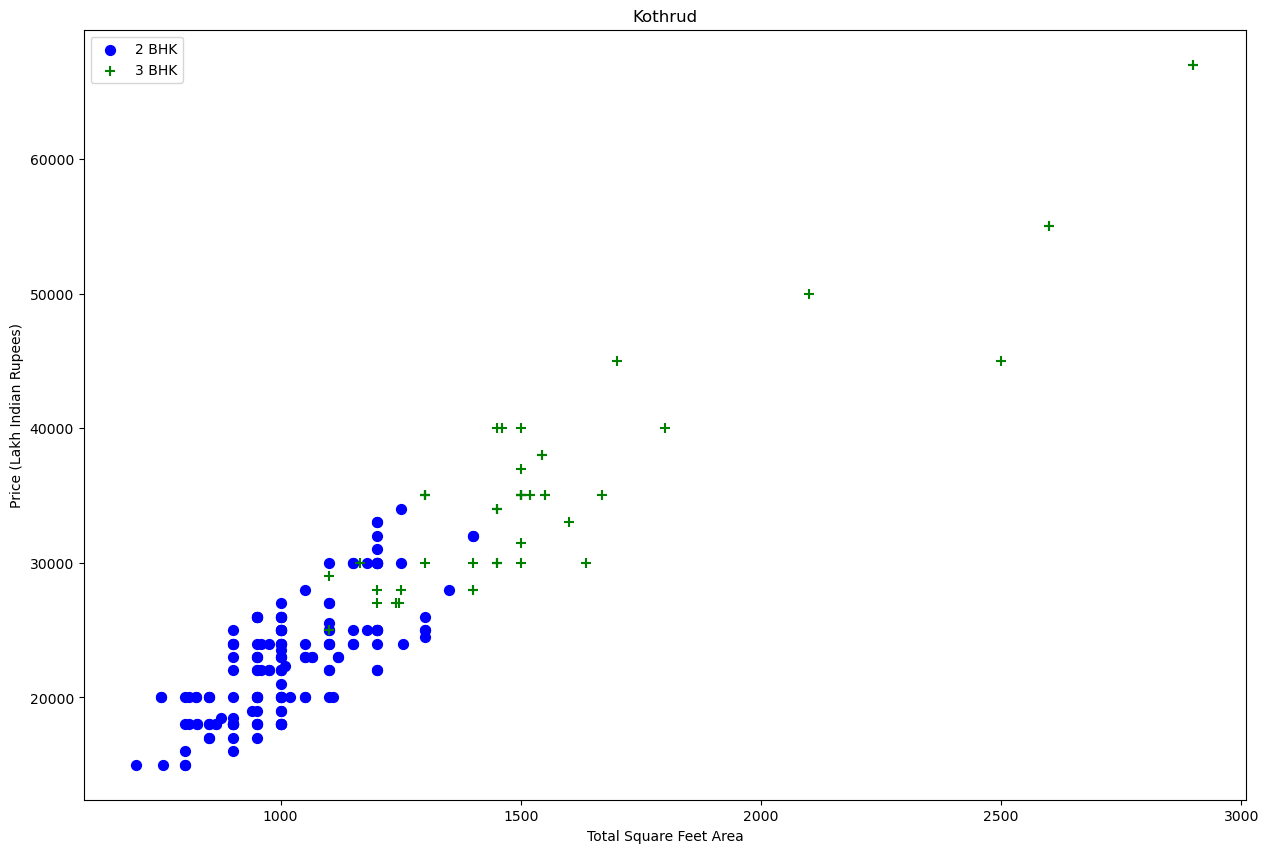

In [36]:
 def plot_scatter_chart(df,location):
    bhk2 = df[(df.locality==location) & (df.bedroom==2)]
    bhk3 = df[(df.locality==location) & (df.bedroom==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.area,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.area,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df6,"Kothrud")

In [37]:
def remov_bedroom_outliers(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('locality'):
        bedroom_stats={}
        for bedroom,bedroom_df in location_df.groupby('bedroom'):
            bedroom_stats[bedroom]={
                'mean': np.mean(bedroom_df.price_per_unit_area),
                'std': np.std(bedroom_df.price_per_unit_area),
                'count': bedroom_df.shape[0]
            }
        for bedroom,bedroom_df in location_df.groupby('bedroom'):
            stats=bedroom_stats.get(bedroom-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_unit_area<(stats['mean'])].index.values)
        return df.drop(exclude_indices,axis='index')
df7 = remov_bedroom_outliers(df6)
len(df7)
            

    

16941

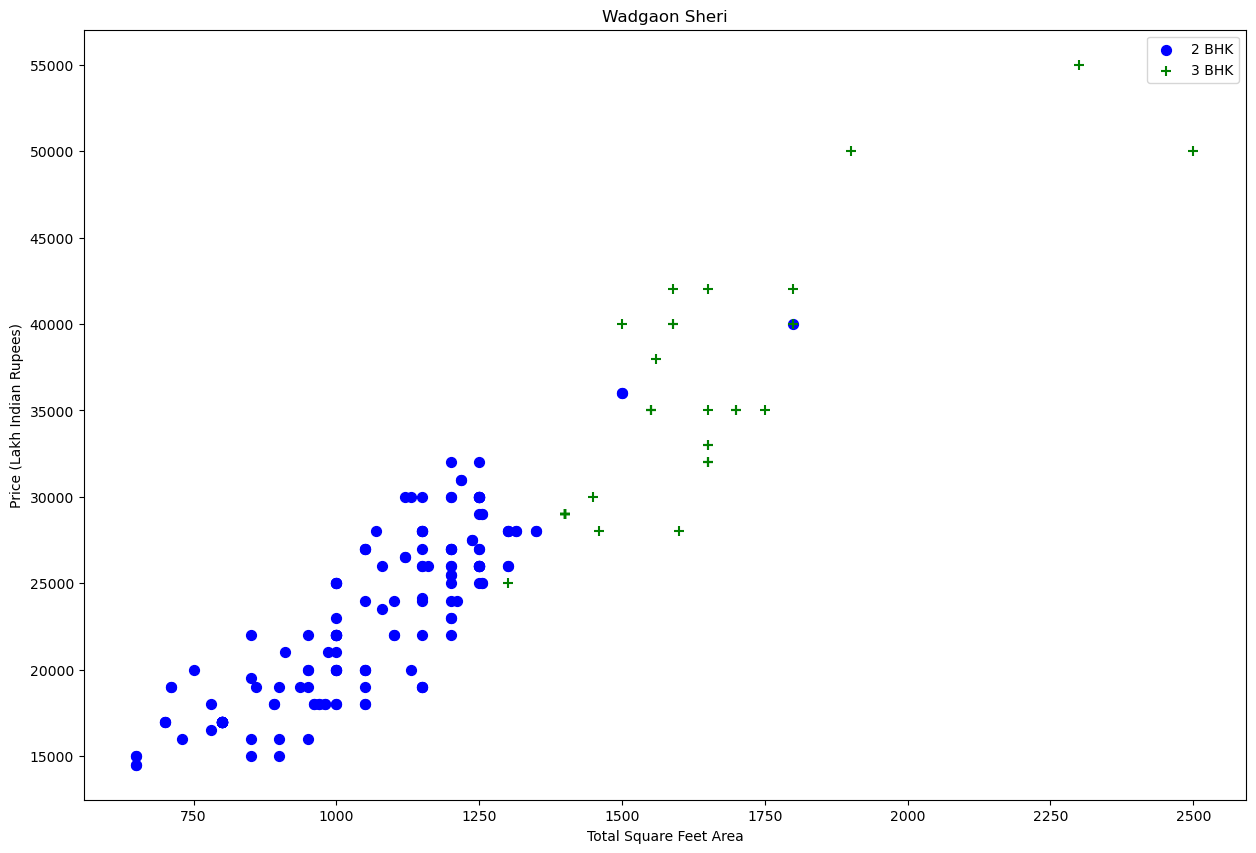

In [38]:
 def plot_scatter_chart(df,location):
    bhk2 = df[(df.locality==location) & (df.bedroom==2)]
    bhk3 = df[(df.locality==location) & (df.bedroom==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.area,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.area,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Wadgaon Sheri")

Text(0, 0.5, 'count')

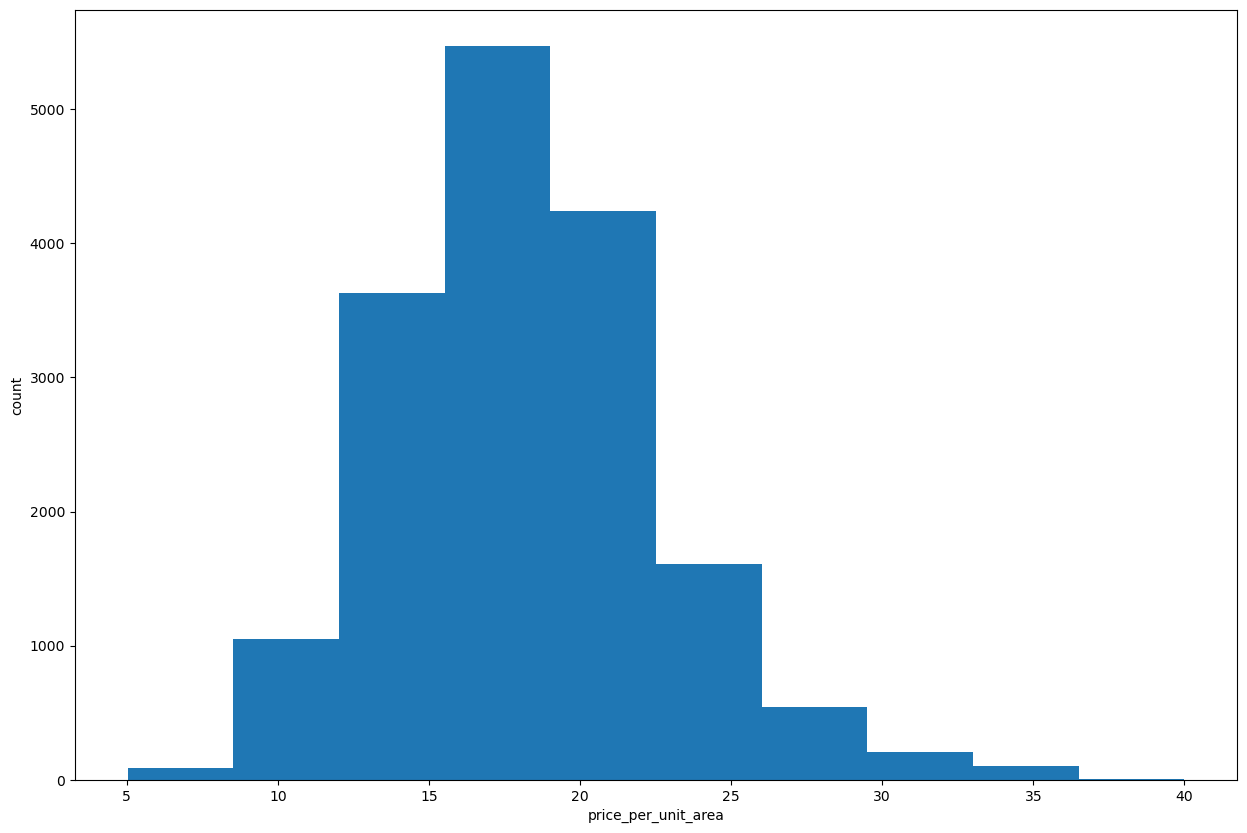

In [39]:
plt.hist(df7.price_per_unit_area)
plt.xlabel('price_per_unit_area')
plt.ylabel('count')

In [40]:
df7.bathrooms.unique()

array([2, 3, 1, 4, 5, 6], dtype=int64)

In [41]:
df7[df7.bathrooms>df7.bedroom+1]

,bedroom,property_type,locality,price,area,furnish_type,bathrooms,price_per_unit_area
263,1,Apartment,Ambegaon Budruk,13000.0,975,Unfurnished,3,13.333333
4228,3,Apartment,Hadapsar,43000.0,2825,Semi-Furnished,5,15.221239
4229,3,Apartment,Hadapsar,43000.0,2825,Semi-Furnished,5,15.221239
5423,3,Apartment,Hinjewadi,26000.0,1250,Furnished,6,20.800000
6142,3,Apartment,Kharadi,60000.0,2845,Semi-Furnished,5,21.089631
6153,3,Apartment,Kharadi,60000.0,2835,Semi-Furnished,5,21.164021
8416,1,Apartment,Manjari Budruk,13000.0,980,Semi-Furnished,3,13.265306
8490,1,Apartment,Mohammed wadi,17000.0,1115,Furnished,3,15.246637
10880,2,Apartment,Sangamvadi,35000.0,1180,Semi-Furnished,4,29.661017
12037,2,Apartment,Viman Nagar,30000.0,1320,Unfurnished,4,22.727273


In [42]:
df8=df7[df7.bathrooms<df7.bedroom+1]
df8.shape

(16114, 8)

In [43]:
df9=df8.drop(['price_per_unit_area'],axis=1)
df9

,bedroom,property_type,locality,price,area,furnish_type,bathrooms
0,2,Apartment,Agalambe,17000.0,1100,Unfurnished,2
1,3,Apartment,Agalambe,45000.0,2200,Furnished,3
2,3,Apartment,Agalambe,45000.0,2200,Furnished,3
3,3,Apartment,Agalambe,45000.0,2200,Furnished,3
4,1,Apartment,Agalambe,6000.0,400,Semi-Furnished,1
...,...,...,...,...,...,...,...
16935,1,Apartment,other,9000.0,710,Unfurnished,1
16936,1,Apartment,other,12000.0,660,Unfurnished,1
16937,1,Studio Apartment,other,3500.0,450,Unfurnished,1
16938,2,Apartment,other,9000.0,1130,Unfurnished,2


In [44]:
df9.property_type.unique()

array(['Apartment', 'Studio Apartment', 'Independent House',
       'Independent Floor', 'Villa', 'Penthouse'], dtype=object)

In [45]:
df9.furnish_type.replace({
    "Furnished":1,
    "Unfurnished":2,
    "Semi-Furnished":3
},inplace=True)
df9.property_type.replace({
    'Apartment':0,
    'Studio Apartment':1,
    'Independent House':2,
    'Independent Floor':3, 
    'Villa':4,
    'Penthouse':5
},inplace=True)

In [46]:
df9

,bedroom,property_type,locality,price,area,furnish_type,bathrooms
0,2,0,Agalambe,17000.0,1100,2,2
1,3,0,Agalambe,45000.0,2200,1,3
2,3,0,Agalambe,45000.0,2200,1,3
3,3,0,Agalambe,45000.0,2200,1,3
4,1,0,Agalambe,6000.0,400,3,1
...,...,...,...,...,...,...,...
16935,1,0,other,9000.0,710,2,1
16936,1,0,other,12000.0,660,2,1
16937,1,1,other,3500.0,450,2,1
16938,2,0,other,9000.0,1130,2,2


In [47]:
dummies = pd.get_dummies(df9[['locality']])
dummies

,locality_Agalambe,locality_Akurdi,locality_Alandi,locality_Ambegaon Budruk,locality_Ambegaon Pathar,locality_Anand Nagar,locality_Ashok Nagar,locality_Aundh,locality_Balaji Nagar,locality_Balewadi,...,locality_Wadgaon Sheri,locality_Wagholi,locality_Wakad,locality_Wanowrie,locality_Wanwadi,locality_Warje,locality_Warje Malwadi,locality_Yerawada,locality_hingne Khurd,locality_other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16935,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
16936,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
16937,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
16938,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [48]:
df10=pd.concat([df9,dummies],axis=1)
df10

,bedroom,property_type,locality,price,area,furnish_type,bathrooms,locality_Agalambe,locality_Akurdi,locality_Alandi,...,locality_Wadgaon Sheri,locality_Wagholi,locality_Wakad,locality_Wanowrie,locality_Wanwadi,locality_Warje,locality_Warje Malwadi,locality_Yerawada,locality_hingne Khurd,locality_other
0,2,0,Agalambe,17000.0,1100,2,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,Agalambe,45000.0,2200,1,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,Agalambe,45000.0,2200,1,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,Agalambe,45000.0,2200,1,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,Agalambe,6000.0,400,3,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16935,1,0,other,9000.0,710,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
16936,1,0,other,12000.0,660,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
16937,1,1,other,3500.0,450,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
16938,2,0,other,9000.0,1130,2,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [49]:
df11=df10.drop(['locality'],axis=1)

In [50]:
x=df11.drop(['price'],axis=1)
x.head()

,bedroom,property_type,area,furnish_type,bathrooms,locality_Agalambe,locality_Akurdi,locality_Alandi,locality_Ambegaon Budruk,locality_Ambegaon Pathar,...,locality_Wadgaon Sheri,locality_Wagholi,locality_Wakad,locality_Wanowrie,locality_Wanwadi,locality_Warje,locality_Warje Malwadi,locality_Yerawada,locality_hingne Khurd,locality_other
0,2,0,1100,2,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,2200,1,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,2200,1,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,2200,1,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,400,3,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
y=df11.price
y.head()

0    17000.0
1    45000.0
2    45000.0
3    45000.0
4     6000.0
Name: price, dtype: float64

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [53]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)
lr_model.score(x_test,y_test)

0.8940118825765009

In [54]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

c=ShuffleSplit(n_splits=5,test_size=0.2,random_state=10)

cross_val_score(LinearRegression(),x,y,cv=c)

array([0.89317973, 0.89048778, 0.88623453, 0.89181326, 0.8891307 ])

In [55]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_estimator_using_GSCV(x,y):
    algos={
        'linear regression' : {
            'model' :LinearRegression(),
            'params' :{
                'fit_intercept': [True,False]
            }
        },
        'lasso' :{
            'model':Lasso(),
            'params':{
                'alpha': [1,2],
                'selection':['random','cyclic']
            }
        },
        'DecisionTreeRegressor':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion' : ["mse", "friedman_mse"],
                'splitter' : ["best", "random"]
            }
        }
    }
    score=[]
    for algo_names,config in algos.items():
        c=ShuffleSplit(n_splits=5,test_size=0.2,random_state=10)
        gs=GridSearchCV(config['model'],config['params'],cv=c,return_train_score=False)
        gs.fit(x,y)
        score.append({
            'model': algo_names,
            'best_score' : gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(score,columns=['model','best_score','best_params'])
find_best_estimator_using_GSCV(x,y)

C:\Users\Ayush Meena\Documents\smaple_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Ayush Meena\Documents\smaple_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ayush Meena\Documents\smaple_project_1\env\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\Ayush Meena\Documents\smaple_project_1\env\lib\site-packages\sklearn\tree\_classes.py", line 177, i

,model,best_score,best_params
0,linear regression,0.890169,{'fit_intercept': True}
1,lasso,0.889598,"{'alpha': 1, 'selection': 'random'}"
2,DecisionTreeRegressor,0.919159,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [56]:
DTR=DecisionTreeRegressor(criterion='friedman_mse', splitter= 'best')
DTR.fit(x_train,y_train)
DTR.score(x_test,y_test)

0.9226292883504094

In [57]:
x.columns

Index(['bedroom', 'property_type', 'area', 'furnish_type', 'bathrooms',
       'locality_Agalambe', 'locality_Akurdi', 'locality_Alandi',
       'locality_Ambegaon Budruk', 'locality_Ambegaon Pathar',
       ...
       'locality_Wadgaon Sheri', 'locality_Wagholi', 'locality_Wakad',
       'locality_Wanowrie', 'locality_Wanwadi', 'locality_Warje',
       'locality_Warje Malwadi', 'locality_Yerawada', 'locality_hingne Khurd',
       'locality_other'],
      dtype='object', length=131)

In [58]:
def predict_price(bedroom, property_type, area, furnish_type, bathrooms,locality):
    loc_index = np.where(x.columns == locality)[0][0]
    
    X = np.zeros(len(x.columns))
    X[0] = bedroom
    X[1] = property_type
    X[2] = area
    X[3] = furnish_type
    X[4] = bathrooms
    if loc_index >= 0:
        X[loc_index] = 1

    return DTR.predict([X])[0]

In [59]:
predict_price(1,1,350,2,1,'locality_Wadgaon Sheri')

C:\Users\Ayush Meena\Documents\smaple_project_1\env\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


7000.0

In [60]:
predict_price(3,0,1085,1,3,'locality_Wagholi')

C:\Users\Ayush Meena\Documents\smaple_project_1\env\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


14000.0

In [61]:
predict_price(3,0,2200,1,3,'locality_Agalambe')

C:\Users\Ayush Meena\Documents\smaple_project_1\env\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


45000.0